In [1]:
import numpy as np
import h5py

In [151]:
import matplotlib.pyplot as plt

In [2]:
sub_file = []
for i in range(10):
    sub_file.append(h5py.File('/home/cossim/CosmicGrowth/6610/subcat2/SubSnap_00%s.hdf5'%(i),'r'))
for i in range(10,100):
    sub_file.append(h5py.File('/home/cossim/CosmicGrowth/6610/subcat2/SubSnap_0%s.hdf5'%(i),'r'))

In [65]:
redshift = np.loadtxt('/home/yunzheng/mock/orphan/redshift.txt')

In [236]:
redshift[35]

5.21783911654972

In [203]:
sub_file[92]['Subhalos'][647801]['LastMaxVmaxPhysical']

115.482834

In [200]:
for i in range(19,36):
    print(sub_file[i]['Subhalos'][647801]['VmaxPhysical'])

102.76122
95.99448
113.04632
110.95464
115.482834
113.478775
110.34136
108.181694
98.22391
91.06766
90.89359
77.286285
89.78051
85.314384
76.531876
0.0
0.0


In [57]:
sub_file[71]['Subhalos'][647801]['SnapshotIndexOfLastMaxVmax']

23

In [234]:
sub_file[92]['Subhalos'][122113160]['SnapshotIndexOfBirth']

89

In [219]:
sub_file[71]['Subhalos'][21407947]['SnapshotIndexOfLastMaxVmax']

36

In [237]:
sub_file[91]['Subhalos'][123452839]['Nbound']

60

In [222]:
for i in range(35,99):
    print(sub_file[i]['Subhalos'][20697051]['VmaxPhysical'])

94.7722
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
67.65894
80.77289
71.13208
77.4134
75.81577
85.285065
80.606384
82.12031
81.633194
80.936676
77.10409
74.90255
74.679085
74.82539
82.01752
81.44966
86.226944
89.15817
93.69668
91.30027
84.559586
80.01631
84.83416
89.56405
88.35868
87.36906
85.851875
84.982414
85.685104
81.90805
82.028366
88.91674
90.88024
88.01984
93.985664
86.78545
84.267204
82.94739
83.2859
86.79457
92.30318
86.175446
85.49245
87.36324
86.331345
83.44591
85.9124
86.03893
79.24385
86.3145
92.311584
88.876175
82.27383
81.712425


In [221]:
for i in range(36,99):
    print(sub_file[i]['Subhalos'][21407947]['VmaxPhysical'])

92.60166
81.81193
82.53856
63.9283
71.82702
75.87186
76.43655
74.03494
71.79673
67.76319
68.25386
68.429016
70.84207
74.52746
66.49656
75.18073
67.57921
70.97187
73.71744
68.13455
65.60954
67.81753
65.66125
71.230515
78.98447
76.18092
75.3382
74.41721
76.69559
80.56857
83.165794
82.641495
77.31985
71.32898
69.11303
78.06351
70.90047
76.42623
78.71778
81.912865
75.344925
68.73965
71.84724
76.213264
73.49819
76.037254
83.15781
75.14583
76.23966
72.63908
73.57622
75.83756
76.33878
75.455666
83.634766
71.617546
69.334
78.38884
79.91306
74.672295
73.331795
74.3454
79.76416


In [240]:
for i in range(91,99):
    print(sub_file[i]['Subhalos'][123452839]['VmaxPhysical'])
    print(sub_file[i]['Subhalos'][123452839]['Nbound'])

40.700706
60
0.0
1
0.0
1
0.0
1
0.0
1
0.0
1
0.0
1
0.0
1


In [241]:
for i in range(89,99):
    print(sub_file[i]['Subhalos'][122113160]['VmaxPhysical'])
    print(sub_file[i]['Subhalos'][122113160]['Nbound'])

45.52648
27
45.10878
72
42.551323
54
0.0
1
0.0
1
0.0
1
37.082535
57
0.0
1
0.0
1
0.0
1


In [121]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snapshot_92_new.npy')

In [128]:
table.shape

(26241654, 11)

In [127]:
len(table)

26241654

In [75]:
vmax = []
for i in range(100):
    v = np.load('/home/yunzheng/mock/color/data/vmax/snapshot_%s.npy'%i)
    vmax.append(v)

MemoryError: Unable to allocate 841. MiB for an array with shape (110166456,) and data type float64

In [129]:
len(vmax)

41

In [124]:
z_form = []
for i in range(20):
    id_sub = int(table[i][0])
    vpeak = table[i][1]
    vform = vpeak * 0.75
    vsnap = int(table[i][2])
    vbirth = int(table[i][3])
    print('The subhalo id is %s'%(id_sub))
    print('The vpeak is %s'%(table[i][1]))
    print('The vform is %s'%(vform))
#     print('The vpeak snapshot is %s'%(vsnap))
    
    if vsnap == vbirth:
        print('The snapshot of vpeak equals to the birthsnap :%s'%vbirth)
        z_form.append(redshift[vsnap])
    else:
        print('The snapshot of vpeak is %s'%vsnap)
        print('The snapshot of birth is %s'%vbirth)
        
        for k in range(vbirth,vsnap):
            if vmax[k][id_sub][1] <= vform < vmax[k+1][id_sub][1]:
                
                print('The snapshot of interpretation is between %s and %s .'%(k,k+1))
                print('The first redshift is %s'%(redshift[k]))
                print('The next redshift is %s'%(redshift[k+1]))
                print('The first vmax is %s'%(vmax[k][id_sub][1]))
                print('The next vmax is %s'%(vmax[k+1][id_sub][1]))
                
                interp_v = [vmax[k][id_sub][1],vmax[k+1][id_sub][1]]
                interp_z = [redshift[k],redshift[k+1]]
                red_new = np.interp(vform,interp_v,interp_z)
                print('The interplated redshift is %s'%red_new)
#                 z_form.append(red_new)
                print('The snapshot number is %d'%k)
                break
                
            else:
                print("This subhalo couldn't interpolate")
                red_new = redshift[vbirth]
#                 z_form.append(redshift[vbirth])
                print('The snapshot number is %d'%k)
    
    
        print('The snapshot number is %d'%k)
        z_form.append(red_new)
              


The subhalo id is 2
The vpeak is 306.27947998046875
The vform is 229.70960998535156
The snapshot of vpeak is 53
The snapshot of birth is 0
This subhalo couldn't interpolate
The snapshot number is 0
This subhalo couldn't interpolate
The snapshot number is 1
This subhalo couldn't interpolate
The snapshot number is 2
This subhalo couldn't interpolate
The snapshot number is 3
This subhalo couldn't interpolate
The snapshot number is 4
This subhalo couldn't interpolate
The snapshot number is 5
This subhalo couldn't interpolate
The snapshot number is 6
This subhalo couldn't interpolate
The snapshot number is 7
This subhalo couldn't interpolate
The snapshot number is 8
This subhalo couldn't interpolate
The snapshot number is 9
This subhalo couldn't interpolate
The snapshot number is 10
This subhalo couldn't interpolate
The snapshot number is 11
This subhalo couldn't interpolate
The snapshot number is 12
This subhalo couldn't interpolate
The snapshot number is 13
The snapshot of interpretation 

IndexError: list index out of range

In [115]:
len(z_form)

1

In [116]:
z_form

[10.467588034097536]

In [130]:
newz = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_with_zform.npy')

In [133]:
newz

array([[ 2.00000000e+00,  3.06279480e+02,  5.30000000e+01, ...,
        -1.23269623e+02,  5.79521484e+02,  1.04675880e+01],
       [ 3.00000000e+00,  4.89822235e+02,  8.80000000e+01, ...,
        -2.69914154e+02,  3.66092186e+01,  3.04289686e+00],
       [ 4.00000000e+00,  4.39215607e+02,  8.70000000e+01, ...,
        -3.94887085e+02,  1.05316719e+02,  7.05297605e+00],
       ...,
       [ 1.23021443e+08,  5.05629730e+01,  9.10000000e+01, ...,
         6.24766479e+02,  4.58173599e+01,  2.89062937e-01],
       [ 1.23110015e+08,  3.84949226e+01,  9.10000000e+01, ...,
        -2.79874512e+02,  2.74074768e+02,  2.89062937e-01],
       [ 1.23452839e+08,  4.07007065e+01,  9.10000000e+01, ...,
        -3.34637604e+02,  3.67284607e+02,  2.53440511e-01]])

In [134]:
fraction = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_new_zform.npy')

In [138]:
fraction[:,1]

array([0.000000e+00, 3.100000e+01, 4.840000e+02, 5.627000e+03,
       3.547800e+04, 1.642810e+05, 5.114370e+05, 1.141944e+06,
       2.000345e+06, 2.561292e+06, 2.943796e+06, 2.756400e+06,
       2.446092e+06, 2.040547e+06, 1.603524e+06, 1.300461e+06,
       1.016395e+06, 8.176020e+05, 6.654760e+05, 5.455750e+05,
       4.554470e+05, 3.847620e+05, 3.262150e+05, 2.797540e+05,
       2.401360e+05, 2.088400e+05, 1.807780e+05, 1.580390e+05,
       1.386170e+05, 1.223620e+05, 1.079230e+05, 9.579500e+04,
       8.545300e+04, 7.631300e+04, 6.767800e+04, 6.136600e+04,
       5.495600e+04, 4.973600e+04, 4.484400e+04, 4.089100e+04,
       3.704600e+04, 3.363500e+04, 3.066600e+04, 2.763100e+04,
       2.562300e+04, 2.351300e+04, 2.149400e+04, 1.979900e+04,
       1.812700e+04, 1.674100e+04, 1.528500e+04, 1.449800e+04,
       1.329300e+04, 1.242200e+04, 1.155900e+04, 1.059400e+04,
       9.873000e+03, 9.159000e+03, 8.751000e+03, 8.068000e+03,
       7.628000e+03, 7.088000e+03, 6.499000e+03, 6.3100

In [141]:
total = fraction[:,1]

In [144]:
total[200]

9.0

# $v_{peak} $ bin compararison

In [145]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_with_zform.npy')

In [146]:
vpeak = table[:,1]
zform = table[:,11]

In [147]:
bin_0 = np.arange(30,1841,5)
inds = np.digitize(vpeak,bin_0)

## 分bin存vpeak和相应的zform

In [148]:
zform_sta = [[]for _ in range(363)]
vpeak_sta = [[]for _ in range(363)]
for n in range(len(vpeak)):
    vpeak_sta[inds[n]].append(vpeak[n])
    zform_sta[inds[n]].append(zform[n])

## 对红移分bin计算 zform cdf

In [149]:
arr_red = np.arange(201)
bin_red = 0 + 12 * arr_red / 200

Text(0, 0.5, '$cdf$')

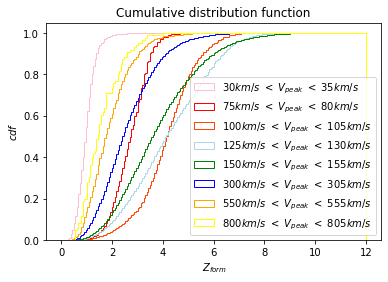

In [174]:
# a = plt.hist(zform_sta[1],bin_red,density = True,cumulative = True,histtype = 'step',color = 'r')
v_5 = plt.hist(zform_sta[5],bin_red,density = True,cumulative = True,histtype = 'step',color = 'pink',label = '$30 km /s \ < \ V_{peak}\ < \ 35 km/s$')
v_10 = plt.hist(zform_sta[10],bin_red,density = True,cumulative = True,histtype = 'step',color = 'red',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
v_15 = plt.hist(zform_sta[15],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$')
v_20 = plt.hist(zform_sta[20],bin_red,density = True,cumulative = True,histtype = 'step',color = 'lightblue',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$')
v_25 = plt.hist(zform_sta[25],bin_red,density = True,cumulative = True,histtype = 'step',color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$')
v_55 = plt.hist(zform_sta[55],bin_red,density = True,cumulative = True,histtype = 'step',color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
v_105 = plt.hist(zform_sta[105],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orange',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
v_155 = plt.hist(zform_sta[155],bin_red,density = True,cumulative = True,histtype = 'step',color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')



plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
# plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak.pdf',dpi = 100)

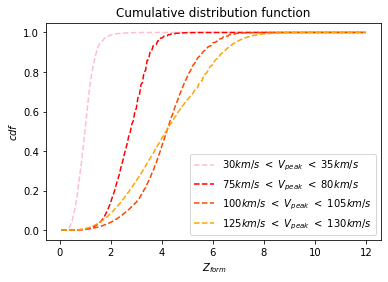

In [183]:
plt.plot(v_5[1][1:],v_5[0],color = 'pink',linestyle = '--',label = '$30 km /s \ < \ V_{peak}\ < \ 35 km/s$')
plt.plot(v_10[1][1:],v_10[0],color = 'red',linestyle = '--',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
plt.plot(v_15[1][1:],v_15[0],color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$',linestyle = '--')
plt.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')
plt.legend()
plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_1.pdf',dpi = 100)

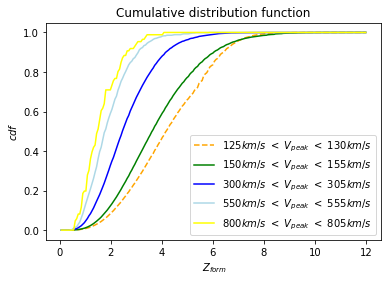

In [188]:
plt.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')


plt.plot(v_25[1][1:],v_25[0],color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$')
plt.plot(v_55[1][1:],v_55[0],color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
plt.plot(v_105[1][1:],v_105[0],color = 'lightblue',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
plt.plot(v_155[1][1:],v_155[0],color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')
plt.legend()
plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_2.pdf',dpi = 100)

## poor fraction

In [156]:
fraction = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_new_zform.npy')
total = fraction[:,1]
poor = fraction[:,0]

In [166]:
frac = poor[1:29] / total[1:29] 

31.0

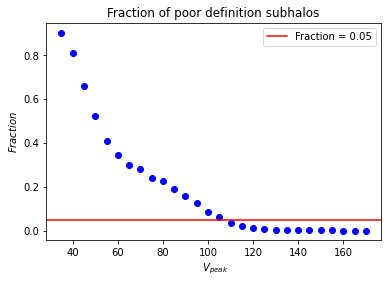

In [195]:
plt.plot(bin_0[1:29],frac,'bo')
plt.axhline(y=0.05, color='r', linestyle='-',label = 'Fraction = 0.05')
plt.title(r'Fraction of poor definition subhalos')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$Fraction$')
plt.legend()
plt.savefig('/home/yunzheng/mock/color/picture/Fraction_vpeak.pdf',dpi = 100)

(0.0, 500.0)

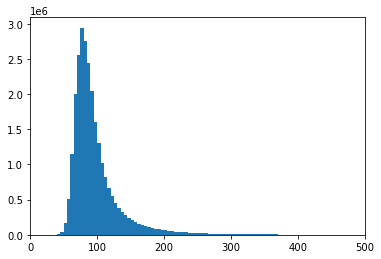

In [197]:
plt.hist(vpeak,bin_0)
plt.xlim(0,500)